###########################################################
# Name    : _Ibrahim Mohamed Ali_
# Section : _Section 1_
##########################################################

# 01.Finding Hub

In [1]:
import networkx as nx

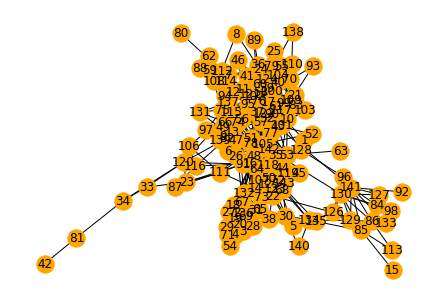

In [39]:
datasetGraph = nx.read_edgelist('./ia-enron-only.edges', nodetype=int)
nx.draw(datasetGraph, with_labels=True, node_color='orange') 

In [3]:
# get the info about the graph
print(nx.info(datasetGraph))

Graph with 143 nodes and 623 edges


/tmp/ipykernel_6004/548779830.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(datasetGraph))


## Aside: the _max_ function

In [4]:
# to get the max number in list of numbers
print(max([5, 2, 1, 7, 4]))

7


In [5]:
# to get the max of list of string lexicographically
print(max(['tomato', 'orange', 'apple']))

tomato


In [7]:
# you can use 'key' function to override the default behavior

# this return the max value according to length
print(max(['tomato', 'pineapple', 'apple'], key=len))

pineapple


In [8]:
# finding the node with max degree
print(max(datasetGraph.nodes, key = datasetGraph.degree))

105


# 02. Centrality Distribution

In [10]:
# 1st we get degree of every node in the graph 
degree_sequence = [datasetGraph.degree(n) for n in datasetGraph.nodes]

In [11]:
degree_sequence

[30,
 2,
 17,
 12,
 13,
 16,
 17,
 10,
 11,
 18,
 20,
 15,
 16,
 16,
 11,
 19,
 17,
 11,
 10,
 7,
 14,
 2,
 12,
 9,
 11,
 10,
 11,
 16,
 10,
 13,
 11,
 42,
 8,
 5,
 6,
 8,
 18,
 15,
 9,
 2,
 17,
 11,
 14,
 7,
 18,
 9,
 8,
 6,
 14,
 14,
 7,
 14,
 17,
 10,
 9,
 16,
 11,
 8,
 9,
 1,
 9,
 4,
 6,
 9,
 5,
 8,
 19,
 4,
 9,
 14,
 6,
 6,
 7,
 23,
 12,
 9,
 10,
 12,
 3,
 10,
 5,
 3,
 7,
 5,
 2,
 3,
 5,
 3,
 7,
 13,
 4,
 4,
 7,
 5,
 9,
 3,
 2,
 10,
 12,
 8,
 10,
 2,
 11,
 3,
 1,
 2,
 9,
 9,
 9,
 7,
 11,
 4,
 15,
 3,
 4,
 4,
 9,
 5,
 9,
 7,
 1,
 9,
 2,
 4,
 2,
 3,
 2,
 1,
 4,
 6,
 4,
 3,
 2,
 6,
 2,
 2,
 1,
 2,
 2,
 1,
 5,
 4,
 2]

In [12]:
# to get the mean and median we package named statistics
import statistics
print('Mean Degree = ', statistics.mean(degree_sequence))
print('Median Degree = ', statistics.median(degree_sequence))

Mean Degree =  8.713286713286713
Median Degree =  8


## plotting the distribution

In [13]:
from collections import Counter

# we will represent the degree value on the x-axis and the frequency 
# of that degree on the y-axis. so lets create a dictionary represents this relation

degree_counts = Counter(degree_sequence)
degree_counts

Counter({30: 1,
         2: 16,
         17: 5,
         12: 5,
         13: 3,
         16: 5,
         10: 9,
         11: 10,
         18: 3,
         20: 1,
         15: 3,
         19: 2,
         7: 9,
         14: 6,
         9: 16,
         42: 1,
         8: 6,
         5: 8,
         6: 7,
         1: 6,
         4: 11,
         23: 1,
         3: 9})

In [14]:
# let's calculate the range of the plot
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plot_x = list(range(min_degree, max_degree+1))

In [15]:
plot_y = [degree_counts.get(x,0) for x in plot_x]
# the 0 refers to the number from which the counter starts

In [16]:
# now finally lets draw our histogram
import matplotlib.pyplot as plt

<BarContainer object of 42 artists>

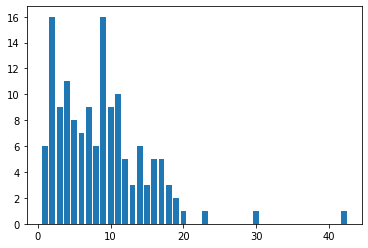

In [17]:
plt.bar(plot_x, plot_y)

## Histogram Binning

In [18]:
betweenness = nx.centrality.betweenness_centrality(datasetGraph)
betweenness_sequence = list(betweenness.values())

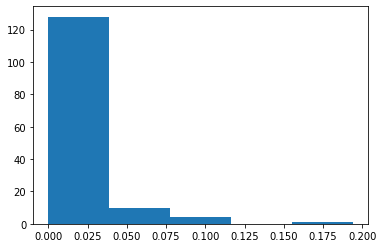

In [19]:
counts, bins, patches = plt.hist(betweenness_sequence, bins=5)

# 03. Testing Robustness

In [20]:
nx.connected_components(datasetGraph)

<generator object connected_components at 0x7fe56e5d7660>

In [21]:
core = next(nx.connected_components(datasetGraph))

In [22]:
len(core)

143

## Random Failure

In [23]:
C = datasetGraph.copy()

In [24]:
import random
nodes_to_remove = random.sample(list(C.nodes), 2) # this will select two nodes randomly
C.remove_nodes_from(nodes_to_remove) # this will delete the selected node

In [54]:
number_of_steps = 25
M = datasetGraph.number_of_nodes() // number_of_steps
num_nodes_removed = range(0, datasetGraph.number_of_nodes(), M)

N = datasetGraph.number_of_nodes()
C = datasetGraph.copy()
random_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    random_attack_core_proportions.append(core_proportion)
    if C.number_of_nodes() > M:
        nodes_to_remove = random.sample(list(C.nodes), M)
        C.remove_nodes_from(nodes_to_remove)

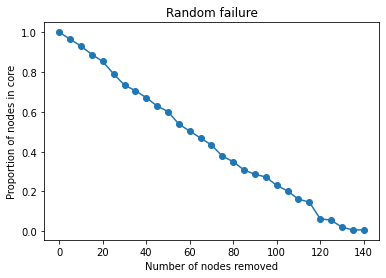

In [55]:
plt.title('Random failure')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o')

## Targeted Attack

In [34]:
nodes_sorted_by_degree = sorted(datasetGraph.nodes, key=datasetGraph.degree, reverse=True)
top_degree_nodes = nodes_sorted_by_degree[:M]
top_degree_nodes

[105, 17, 95, 48, 132]

In [57]:
N = datasetGraph.number_of_nodes()
number_of_steps = 25
M = N

num_nodes_removed = range(0, N, M)
C = datasetGraph.copy()
targeted_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    targeted_attack_core_proportions.append(core_proportion)
    if C.number_of_nodes() > M:
        nodes_sorted_by_degree = sorted(C.nodes, key=C.degree, reverse=True)
        nodes_to_remove = nodes_sorted_by_degree[:M]
        C.remove_nodes_from(nodes_to_remove)

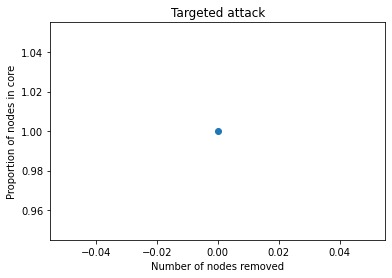

In [52]:
plt.title('Targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, targeted_attack_core_proportions, marker='o')

ValueError: x and y must have same first dimension, but have shapes (1,) and (29,)

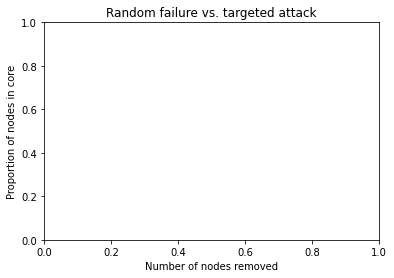

In [58]:
plt.title('Random failure vs. targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions)
plt.plot(num_nodes_removed, targeted_attack_core_proportions)
plt.legend()